# Hand Written Digit Prediction

The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualise the first 4 images. The target attribute of the dataset stores the digit each image represents.

In [1]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import Data

from sklearn.datasets import load_digits

In [3]:
df=load_digits()

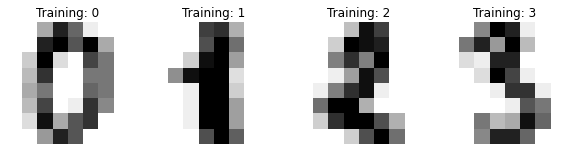

In [5]:
_, axes=plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" %label)

In [6]:
# Data Preprocessing

df.images.shape

(1797, 8, 8)

In [7]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
df.images[0].shape

(8, 8)

In [9]:
len(df.images)

1797

In [10]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [11]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [12]:
data[0].shape

(64,)

In [13]:
data.shape

(1797, 64)

In [14]:
# Scaling Image Data

data.min()

0.0

In [15]:
data.max()

16.0

In [16]:
data=data/16

In [19]:
data.max()

1.0

In [20]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [21]:
# Train Test Split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [22]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
# Predict Test Data

y_pred=rf.predict(x_test)

In [24]:
y_pred

array([3, 0, 2, 8, 7, 7, 0, 2, 6, 3, 8, 3, 5, 8, 7, 7, 0, 5, 9, 9, 6, 6,
       4, 0, 9, 8, 9, 3, 6, 1, 5, 7, 4, 1, 5, 2, 0, 4, 6, 0, 1, 7, 5, 1,
       2, 9, 5, 6, 0, 7, 1, 3, 0, 8, 8, 9, 3, 1, 2, 0, 4, 4, 2, 2, 2, 6,
       2, 4, 6, 4, 7, 1, 3, 3, 7, 5, 9, 6, 8, 8, 8, 9, 7, 5, 8, 3, 1, 2,
       8, 4, 8, 3, 9, 7, 1, 5, 6, 1, 1, 3, 1, 1, 3, 1, 4, 9, 9, 8, 8, 7,
       2, 9, 7, 5, 9, 9, 0, 0, 0, 2, 2, 1, 5, 4, 8, 8, 5, 6, 0, 1, 6, 1,
       3, 3, 6, 5, 7, 6, 4, 7, 9, 0, 3, 9, 3, 1, 3, 4, 5, 2, 3, 5, 8, 6,
       3, 8, 1, 6, 5, 1, 5, 4, 2, 0, 1, 7, 6, 9, 8, 5, 4, 2, 1, 3, 0, 3,
       7, 6, 3, 3, 7, 2, 2, 0, 7, 5, 7, 0, 0, 4, 7, 1, 0, 7, 1, 7, 3, 5,
       4, 6, 3, 9, 4, 7, 4, 4, 6, 1, 4, 4, 6, 5, 2, 6, 2, 6, 5, 6, 9, 9,
       7, 4, 0, 1, 5, 1, 2, 7, 2, 5, 1, 0, 2, 9, 2, 1, 2, 9, 0, 5, 1, 9,
       4, 1, 0, 6, 5, 0, 9, 8, 6, 2, 6, 4, 0, 2, 1, 8, 3, 4, 3, 4, 4, 8,
       3, 1, 3, 7, 4, 5, 0, 2, 0, 3, 5, 4, 4, 8, 0, 5, 2, 2, 1, 2, 9, 6,
       7, 1, 3, 4, 3, 0, 4, 5, 0, 6, 2, 2, 4, 5, 8,

In [25]:
# Model Accuracy

from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[55,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 47,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 56,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 53,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 55,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0, 42,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  0, 52]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.98      0.98      0.98        60
           2       1.00      0.98      0.99        53
           3       0.98      0.98      0.98        48
           4       0.95      0.97      0.96        58
           5       0.96      0.95      0.95        56
           6       0.98      1.00      0.99        54
           7       0.96      0.98      0.97        56
           8       0.98      0.95      0.97        44
           9       0.93      0.95      0.94        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

